# Exam marks prediction using Simple Linear Regression
## Author :- Sandesh Yadav

### *Importing Libraries*

In [59]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt

### *Load Dataset from Local Directory*

In [60]:
dataset = pd.read_csv(r"C:\Users\Lenovo\Downloads\data.csv")

### *Summarize the dataset*

In [61]:
print(dataset.shape)
print(dataset.head(5))

(25, 2)
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


### *Finding & Removing NA values from our Features X*

In [62]:
dataset.columns[dataset.isna().any()]

Index([], dtype='object')

In [63]:
#dataset.hours = dataset.hours.fillna(dataset.hours.mean())

### *Segregate Dataset into Input X & Output Y*

In [64]:
X = dataset.iloc[:, :-1].values
print(X.shape)
X

(25, 1)


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [65]:
Y = dataset.iloc[:, -1].values
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### *Training Dataset using Linear Regression and evaluting using Kfold cross validation*

In [66]:
kf = KFold(n_splits =10, shuffle = True, random_state = 70)
splits = list(kf.split(X))
scores = []
for i in range(0,10):
    train_indices, test_indices = splits[i]
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = Y[train_indices]
    y_test = Y[test_indices]
    model = LinearRegression(normalize = True)
    model.fit(X_train,y_train)
    scores.append((model.score(X_test, y_test)))

print("Net accuracy of the model is :", np.mean(scores)*100)

Net accuracy of the model is : 89.0182177417953


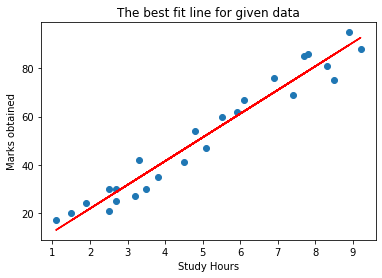

In [67]:
line = model.coef_*X+model.intercept_
plt.scatter(X,Y)
plt.plot(X,line,color = 'r')
plt.title("The best fit line for given data")
plt.xlabel("Study Hours")
plt.ylabel("Marks obtained")
plt.show()

### *Predicted score for student's study hours of custom values*

In [68]:
a= [[9.25]]
PredictedmodelResult = model.predict(a)
print(int(PredictedmodelResult))

93


### If a student studies for 9.25hrs, then his/her predicted score would be 93 marks. ###